* Nama: Ichsan Setiawan
* NIM: 25/562584/PPA/07067
* Kelas: Pembelajaran Mesin dan Aplikasinya
* Dosen Pengampu: Yunita Sari, S.Kom., M.Sc., Ph.D.



Tugas Klasifikasi Menggunakan Algoritma Logistic Regression dan Naive Bayes

* Dataset: English Premier League Stats (2021-2024) yang diperoleh dari Kaggle dan berisi data statistik seluruh pertandingan sepak bola di liga Inggris dari tahun 2021 sampai dengan 2024
* Task: Klasifikasi untuk memprediksi apakah tim tuan rumah dapat mencetak lebih dari 1 gol berdasarkan statistik pertandingan (possession, shots, passes, dll.)


1. Logistic Regression

In [1]:
import pandas as pd
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Memuat dataset
file_path = "mydata.csv"

df_epl_stats = kagglehub.load_dataset(KaggleDatasetAdapter.PANDAS, "mohamadsallah5/english-premier-league-stats20212024", file_path)

/tmp/ipython-input-3646560355.py:8: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df_epl_stats = kagglehub.load_dataset(KaggleDatasetAdapter.PANDAS, "mohamadsallah5/english-premier-league-stats20212024", file_path)


100%|██████████| 243k/243k [00:00<00:00, 2.54MB/s]


In [2]:
df_epl_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1140 entries, 0 to 1139
Data columns (total 40 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              1140 non-null   object 
 1   clock             1140 non-null   object 
 2   stadium           1140 non-null   object 
 3   class             1140 non-null   object 
 4   attendance        1140 non-null   object 
 5   Home Team         1140 non-null   int64  
 6   Goals Home        1140 non-null   int64  
 7   Away Team         1140 non-null   int64  
 8   Away Goals        1140 non-null   int64  
 9   home_possessions  1140 non-null   float64
 10  away_possessions  1140 non-null   float64
 11  home_shots        1140 non-null   int64  
 12  away_shots        1140 non-null   int64  
 13  home_on           1140 non-null   int64  
 14  away_on           1140 non-null   int64  
 15  home_off          1140 non-null   int64  
 16  away_off          1140 non-null   int64  


Tidak ada nilai null (missing values) yang akan ditangani di dalam dataset ini

In [3]:
df_epl_stats.head()

,date,clock,stadium,class,attendance,Home Team,Goals Home,Away Team,Away Goals,home_possessions,...,away_duels,home_saves,away_saves,home_fouls,away_fouls,home_yellow,away_yellow,home_red,away_red,links
0,28th May 2023,4:30pm,Emirates Stadium,h,"60,095",2,5,13,0,51.0,...,52.2,0,3,8,11,0,0,0,0,https://www.skysports.com/football/arsenal-vs-...
1,28th May 2023,4:30pm,Villa Park,h,"42,212",7,2,6,1,40.3,...,47.8,3,3,15,16,4,4,0,0,https://www.skysports.com/football/aston-villa...
2,28th May 2023,4:30pm,Gtech Community Stadium,h,"17,120",9,1,1,0,34.4,...,50.0,2,3,12,8,4,0,0,0,https://www.skysports.com/football/brentford-v...
3,28th May 2023,4:30pm,Stamford Bridge,d,"40,130",12,1,4,1,64.4,...,45.5,3,5,9,11,0,0,0,0,https://www.skysports.com/football/chelsea-vs-...
4,28th May 2023,4:30pm,Selhurst Park,d,"25,198",11,1,16,1,66.0,...,41.7,3,2,9,13,0,2,0,0,https://www.skysports.com/football/crystal-pal...


In [4]:
df_epl_stats.tail()

,date,clock,stadium,class,attendance,Home Team,Goals Home,Away Team,Away Goals,home_possessions,...,away_duels,home_saves,away_saves,home_fouls,away_fouls,home_yellow,away_yellow,home_red,away_red,links
1135,13/09/2020,2:00pm,The Hawthorns,a,0,24,0,18,3,35.8,...,36.0,4,1,12,9,1,1,0,0,https://www.skysports.com/football/west-bromwi...
1136,12/9/2020,8:00pm,London Stadium,a,0,14,0,4,2,58.3,...,59.5,0,3,13,7,2,2,0,0,https://www.skysports.com/football/west-ham-un...
1137,12/9/2020,5:30pm,Anfield,h,0,5,4,19,3,48.8,...,46.2,0,3,9,6,1,0,0,0,https://www.skysports.com/football/liverpool-v...
1138,12/9/2020,3:00pm,Selhurst Park,h,0,11,1,20,0,29.4,...,50.0,5,2,14,11,2,1,0,0,https://www.skysports.com/football/crystal-pal...
1139,12/9/2020,12:30pm,Craven Cottage,a,0,10,0,2,3,45.6,...,46.7,2,2,12,12,2,2,0,0,https://www.skysports.com/football/fulham-vs-a...


In [5]:
df_epl_stats.describe()

,Home Team,Goals Home,Away Team,Away Goals,home_possessions,away_possessions,home_shots,away_shots,home_on,away_on,...,home_duels,away_duels,home_saves,away_saves,home_fouls,away_fouls,home_yellow,away_yellow,home_red,away_red
count,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,...,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000
mean,11.450000,1.502632,11.450000,1.290351,50.816754,49.205965,13.558772,11.474561,4.715789,4.039474,...,50.753772,49.342632,2.728070,3.178070,10.620175,10.567544,1.587719,1.722807,0.051754,0.053509
std,6.815784,1.359450,6.815784,1.233457,12.896181,12.899495,5.615658,5.048515,2.564688,2.359525,...,10.757576,10.777668,1.856035,1.978562,3.415676,3.560070,1.216014,1.279406,0.233210,0.236554
min,1.000000,0.000000,1.000000,0.000000,17.900000,17.600000,1.000000,1.000000,0.000000,0.000000,...,10.000000,10.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,5.750000,0.750000,5.750000,0.000000,40.900000,39.100000,9.000000,8.000000,3.000000,2.000000,...,43.800000,42.300000,1.000000,2.000000,8.000000,8.000000,1.000000,1.000000,0.000000,0.000000
50%,11.000000,1.000000,11.000000,1.000000,50.850000,49.200000,13.000000,11.000000,5.000000,4.000000,...,50.000000,50.000000,2.000000,3.000000,10.000000,10.000000,1.000000,2.000000,0.000000,0.000000
75%,17.250000,2.000000,17.250000,2.000000,60.900000,59.125000,17.000000,15.000000,6.000000,5.000000,...,57.700000,56.350000,4.000000,4.000000,13.000000,13.000000,2.000000,3.000000,0.000000,0.000000
max,25.000000,9.000000,25.000000,7.000000,82.400000,82.100000,33.000000,31.000000,15.000000,14.000000,...,90.000000,90.000000,10.000000,11.000000,23.000000,25.000000,6.000000,7.000000,2.000000,2.000000


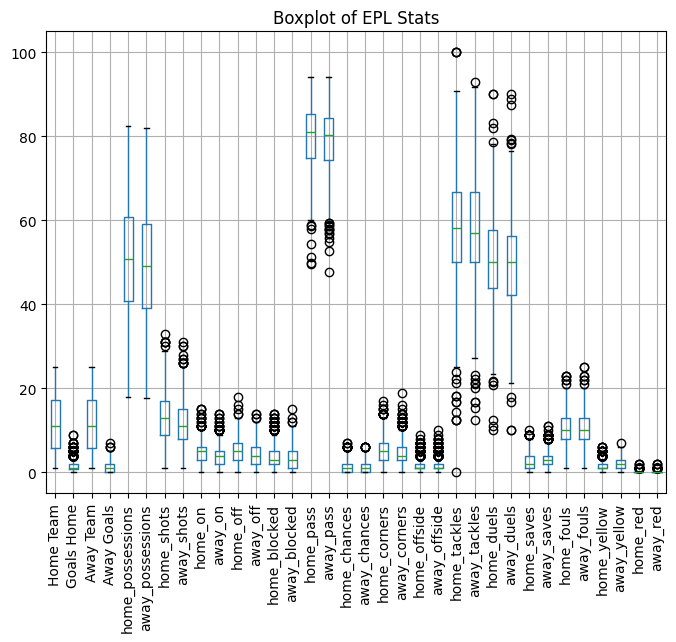

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

df_epl_stats.boxplot(figsize=(8,6))
plt.title('Boxplot of EPL Stats')
plt.xticks(rotation=90)
plt.show()

Terdapat outlier (nilai ekstrem) pada banyak fitur prediktor (seperti home_shots atau home_on) mengindikasikan ada beberapa pertandingan dengan statistik yang tidak biasa.

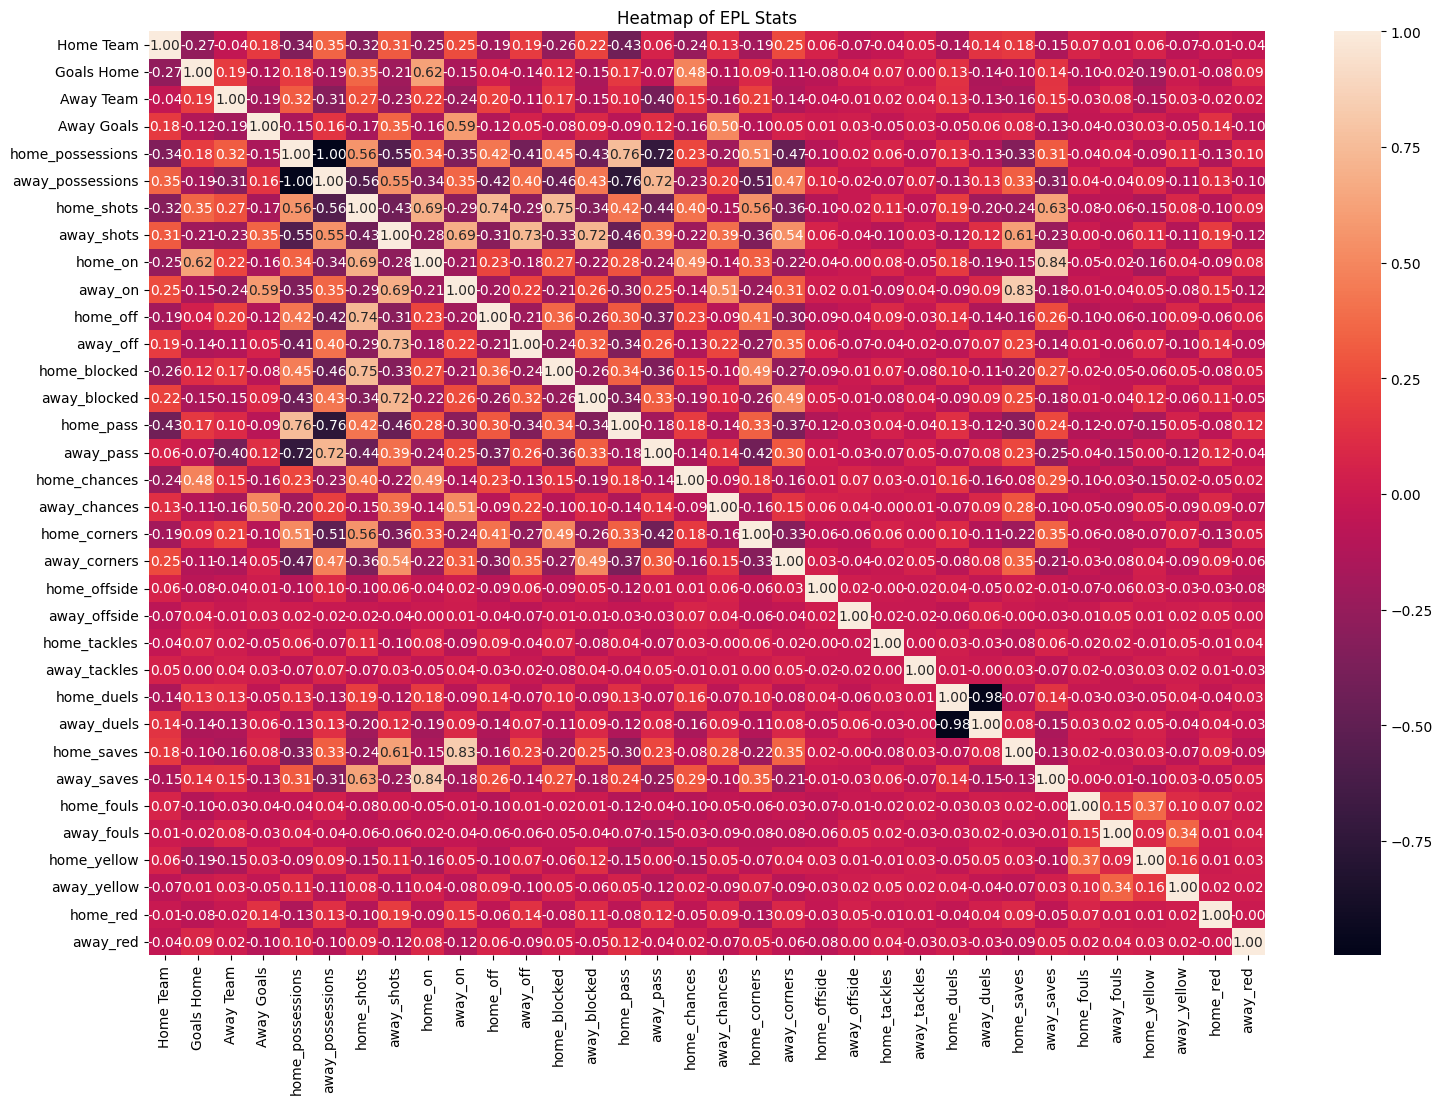

In [7]:
plt.figure(figsize=(18,12))
df_epl_stats_num = df_epl_stats.select_dtypes(include=['int64','float64'])
sns.heatmap(df_epl_stats_num.corr(), annot=True, fmt='.2f')
plt.title('Heatmap of EPL Stats')
plt.show()

Dari visualisasi heatmap di atas, dapat dilihat bahwa hubungan antara fitur 'home_on' (tembakan ke arah gawang tim tamu oleh tim tuan rumah yang tepat sasaran) dengan fitur 'Goals Home' (gol yang diciptakan oleh tim tuan rumah) memiliki nilai sebesar 0.62, artinya kedua variabel memiliki korelasi yang kuat. Semakin banyak tembakan yang tepat sasaran, maka semakin besar peluang gol tercipta.

In [8]:
# Membuat kolom baru dengan nama "target" sebagai variabel target
df_epl_stats['target'] = (df_epl_stats['Goals Home'] > 1).astype(int)

In [9]:
# Menampilkan proporsi kelas 1 dan 0
print(df_epl_stats['target'].value_counts())
print(df_epl_stats['target'].value_counts(normalize=True))

target
0    659
1    481
Name: count, dtype: int64
target
0    0.57807
1    0.42193
Name: proportion, dtype: float64


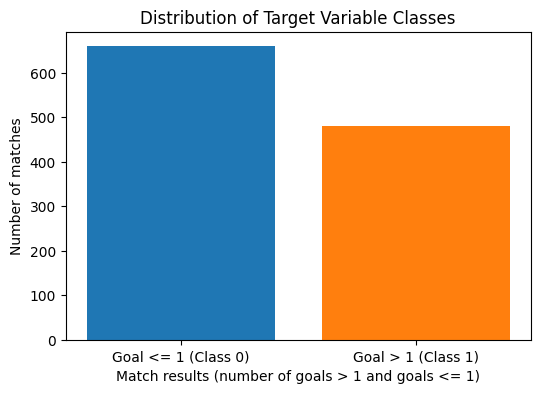

In [10]:
labels = ['Goal <= 1 (Class 0)', 'Goal > 1 (Class 1)']
plt.figure(figsize=(6, 4))
bars = plt.bar(df_epl_stats['target'].value_counts().index, df_epl_stats['target'].value_counts(),
               color=['#1f77b4', '#ff7f0e'],
               tick_label=labels)
plt.ylabel('Number of matches')
plt.xlabel('Match results (number of goals > 1 and goals <= 1)')
plt.title('Distribution of Target Variable Classes')
plt.show()

* Feature Selection

Memilih fitur-fitur yang dianggap berpengaruh dalam kasus klasifikasi ini

In [11]:
# Mengambil semua fitur numerik di dalam dataset
all_numeric_features = [
    'home_possessions', 'away_possessions',
    'home_shots', 'away_shots',
    'home_on', 'away_on',
    'home_off', 'away_off',
    'home_blocked', 'away_blocked',
    'home_pass', 'away_pass',
    'home_chances', 'away_chances',
    'home_corners', 'away_corners',
    'home_offside', 'away_offside',
    'home_tackles', 'away_tackles',
    'home_duels', 'away_duels',
    'home_saves', 'away_saves',
    'home_fouls', 'away_fouls',
    'home_yellow', 'away_yellow',
    'home_red', 'away_red'
]

# Menghitung koefisien korelasi antara setiap fitur numerik dengan target
correlation_results = df_epl_stats[all_numeric_features].corrwith(df_epl_stats['target'])

print(correlation_results.sort_values(ascending=False))

home_on             0.511814
home_chances        0.394294
home_shots          0.298781
home_possessions    0.173000
home_pass           0.148972
away_saves          0.126945
home_duels          0.110628
home_blocked        0.105794
away_offside        0.071686
home_corners        0.059956
home_tackles        0.053478
away_red            0.047041
home_off            0.037051
away_yellow         0.026847
away_fouls          0.002002
away_tackles       -0.002407
home_red           -0.060148
home_fouls         -0.066748
home_offside       -0.076998
away_corners       -0.088198
away_pass          -0.089101
away_chances       -0.101487
home_saves         -0.104549
away_duels         -0.112956
away_off           -0.116715
away_blocked       -0.134741
away_on            -0.138560
home_yellow        -0.158832
away_possessions   -0.175025
away_shots         -0.182064
dtype: float64


Ditetapkan ambang batas nilai korelasi sebesar 0,10 (≥ 0.10 atau ≤ -0.10) untuk pemilihan fitur (korelasi positif kuat dan korelasi negatif kuat). Tujuannya adalah untuk menyederhanakan model dengan hanya mempertahankan fitur yang memiliki hubungan linier yang signifikan dengan variabel target, sehingga dapat mengurangi kompleksitas komputasi.

In [12]:
# Fitur-fitur yang memenuhi ambang batas
selected_features = [
    'home_on', 'home_chances', 'home_shots', 'home_possessions',
    'home_pass', 'away_saves', 'home_duels', 'home_blocked',
    'away_shots', 'away_possessions', 'home_yellow', 'away_on',
    'away_blocked', 'away_off', 'away_duels', 'home_saves', 'away_chances'
]

X = df_epl_stats[selected_features]
Y = df_epl_stats['target']

X = X.values # Matriks fitur
Y = Y.values.reshape(-1, 1) # Vektor target, mengubah dimensi array menjadi vektor kolom

* Splitting Data

Training data sebesar 80% dan testing data sebesar 20%

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(f"X_train: {X_train.shape}") # Fitur untuk melatih model, (baris/sampel, kolom/fitur)
print(f"X_test: {X_test.shape}") # Fitur untuk menguji model
print(f"Y_train: {Y_train.shape}") # Variabel target untuk melatih model
print(f"Y_test: {Y_test.shape}") # Variabel target untuk menguji model

X_train: (912, 17)
X_test: (228, 17)
Y_train: (912, 1)
Y_test: (228, 1)


Standarisasi data, agar skala data numerik berada dalam rentang yang seragam

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train[:5, 0])
print(X_train_scaled[:5, 0])

[ 4.  2. 14.  4.  3.]
[-0.3076216  -1.09347845  3.62166268 -0.3076216  -0.70055003]


* Melatih Model

In [15]:
import numpy as np

# Menambahkan kolom baru yang mewakili bias (theta_0 dengan koefisien x_0 = 1)
X_train_bias = np.hstack((np.ones((X_train_scaled.shape[0], 1)), X_train_scaled))
X_test_bias = np.hstack((np.ones((X_test_scaled.shape[0], 1)), X_test_scaled))

# Fungsi sigmoid, digunakan untuk mengubah nilai yang dihasilkan oleh hypothesis_function yang awalnya berada pada rentang ((-)tak hingga, (+)tak hingga) menjadi dalam rentang (0,1)
def sigmoid_function(z):
    return 1 / (1 + np.exp(-z))

# Fungsi hipotesis (h_theta(X)), digunakan untuk menghitung probabilitas prediksi (h_theta(X)) dari fitur prediktor (X) dan parameter model (theta)
def hypothesis_function(X, theta):
    z = np.dot(X, theta) # dot product/kombinasi linier
    return sigmoid_function(z)

# Cost function, digunakan untuk mengukur seberapa besar kesalahan model (seberapa buruk prediksi yang dibuat model (h_theta(X)))
def cost_function(X, Y, theta):
    m = len(Y)
    h = hypothesis_function(X, theta)
    cost = (-1/m) * np.sum(Y * np.log(h) + (1 - Y) * np.log(1 - h))
    return cost

# Gradient descent, digunakan untuk menemukan nilai parameter (theta) yang optimal, sehingga menghasilkan cost yang minimum
def gradient_descent(X, Y, theta, learning_rate, n_iterations):
    m = len(Y)
    cost_history = [] # Menyimpan nilai cost

    for i in range(n_iterations):
        # Menghitung error, seberapa jauh prediksi (h_theta) dari nilai yang sebenarnya (Y)
        error = hypothesis_function(X, theta) - Y

        # Menghitung gradien menggunakan rumus yang lebih sederhana, menjalankan perhitungan dalam bentuk matriks, sehingga perhitungan semua parameter (theta) dan semua fitur (X) dapat dilakukan secara simultan
        gradient = (1/m) * np.dot(X.T, error) # Menggunakan perkalian matriks (kombinasi linier) antara matriks fitur prediktor (X) transpose dengan error

        # Memperbarui parameter
        theta = theta - learning_rate * gradient

        # Menghitung cost setelah parameter diperbarui
        cost = cost_function(X, Y, theta)
        cost_history.append(cost)

    return theta, cost_history

In [16]:
# Menghitung jumlah kolom dalam fitur pelatihan (X_train_bias)
n_features = X_train_bias.shape[1]

# Inisialisasi semua bobot dengan nilai 0
initial_theta = np.zeros((n_features, 1))

learning_rate = 0.1 # Tingkat kecepatan belajar (alpha)
n_iterations = 1000 # Jumlah iterasi

final_theta, cost_history = gradient_descent(
    X_train_bias,
    Y_train,
    initial_theta,
    learning_rate,
    n_iterations
)

print(f"Initial cost: {cost_history[0]:.4f}")
print(f"Final cost: {cost_history[-1]:.4f}")
print(f"Final parameter: \n{final_theta}")

Initial cost: 0.6764
Final cost: 0.2644
Final parameter: 
[[-2.33455945e-01]
 [ 4.09459554e+00]
 [ 3.15674673e-01]
 [ 9.83834142e-02]
 [-2.27547853e-02]
 [ 1.60028159e-02]
 [-3.11739942e+00]
 [ 1.07500522e-01]
 [-1.16217834e-01]
 [ 1.40288928e-02]
 [-8.99812333e-02]
 [-1.71920322e-01]
 [ 3.14216548e-03]
 [ 1.31651429e-02]
 [ 2.15069349e-02]
 [-1.55732209e-02]
 [-1.08382825e-01]
 [ 1.77097705e-02]]


* Menguji Model

In [17]:
Y_pred = hypothesis_function(X_test_bias, final_theta)
Y_pred_binary = (Y_pred >= 0.5).astype(int) # Konversi hasil prediksi ke kelas biner

print(f"Y_prediction: \n{Y_pred[:5]}")
print(f"Y_prediction_binary: \n{Y_pred_binary[:5]}")

Y_prediction: 
[[0.27733013]
 [0.12268821]
 [0.49529596]
 [0.49794826]
 [0.03453737]]
Y_prediction_binary: 
[[0]
 [0]
 [0]
 [0]
 [0]]


In [18]:
# Fungsi evaluasi metrik
def evaluation_metrics(Y_test, Y_pred):
    TP = np.sum((Y_test == 1) & (Y_pred == 1)) # True positive
    TN = np.sum((Y_test == 0) & (Y_pred == 0)) # True negative
    FP = np.sum((Y_test == 0) & (Y_pred == 1)) # False positive
    FN = np.sum((Y_test == 1) & (Y_pred == 0)) # False negative

    # Accuracy
    accuracy = (TP + TN) / (TP + TN + FP + FN) if (TP + TN + FP + FN) > 0 else 0.0 # Hanya dihitung ketika nilai penyebut > 0, jika tidak, kembalikan nilai 0

    # Precision
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0.0

    # Recall
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0.0

    # F1-Measure
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0.0

    # Confusion matrix
    conf_matrix = np.array([[TP, FP], [FN, TN]])

    return accuracy, precision, recall, f1_score, conf_matrix

In [19]:
accuracy, precision, recall, f1_score, conf_matrix = evaluation_metrics(Y_test, Y_pred_binary)

print("Confusion Matrix:")
print(conf_matrix.astype(int))
print("-" * 17)
print(f"Akurasi: {accuracy:.4f}")
print(f"Presisi: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1_score:.4f}")

Confusion Matrix:
[[ 72   3]
 [ 16 137]]
-----------------
Akurasi: 0.9167
Presisi: 0.9600
Recall: 0.8182
F1 Score: 0.8834


* Hasil dan Analisis

Model ini menunjukkan performa yang kuat dengan akurasi mencapai 91,67% dan presisi tinggi (96%), sehingga prediksinya hampir selalu tepat. Walaupun masih ada sebagian kecil kemenangan yang luput terdeteksi (recall 81,82%), F1-Score 88,34% menegaskan keseimbangan yang baik antara presisi dan recall, sehingga model ini dapat diandalkan untuk tugas klasifikasi.



---



2. Naive Bayes

Tipe Naive Bayes yang akan digunakan pada kasus klasifikasi ini adalah Gaussian Naive Bayes. Alasannya adalah karena fitur-fitur yang ada di dalam dataset EPL Stats (2021-2024) bertipe numerik

* Melatih model

In [20]:
# Model training
def gaussian_nb(X, Y):
    prior_probs = {} # Prior probability (P(cj))
    means = {} # Rata-rata setiap fitur per kelas
    variances = {} # Variansi setiap fitur per kelas
    classes = np.unique(Y) # Kelas 0 dan 1
    n_samples = len(Y) # Jumlah seluruh sampel

    # Variabel untuk Laplace Smoothing
    n_classes = len(classes) # Jumlah kelas: kelas 0 dan 1
    alpha = 1 # Parameter smoothing

    # Mengubah dimensi array Y (target) menjadi array satu dimensi, untuk tujuan perhitungan statistik dan indexing
    Y_flat = Y.flatten()

    # Melakukan perhitungan pada setiap kelas
    for c in classes:
        n_samples_c = np.sum(Y_flat == c) # Jumlah sampel pada kelas c (0/1)
        prior_probs[c] = (n_samples_c + alpha) / (n_samples + n_classes * alpha) # Prior probability (P(cj))
        X_c = X[Y_flat == c] # Setiap fitur pada kelas c (0/1)
        means[c] = np.mean(X_c, axis=0) # Menghitung rata-rata setiap fitur pada kelas c (0/1)
        variances[c] = np.var(X_c, axis=0) # Menghitung variansi setiap fitur pada kelas c (0/1)

    return prior_probs, means, variances

In [21]:
# Conditional Probability (P(xi|cj)), menggunakan Probability Density Function (PDF)
def gaussian_pdf(X, mean, variance):
    return (1 / np.sqrt(2 * np.pi * variance)) * np.exp(-((X - mean) ** 2) / (2 * variance))

In [22]:
# Memprediksi kelas dari sampel yang baru
def predict_gnb(X, prior_probs, means, variances):
    n_features = X.shape[1]
    classes = np.unique(list(prior_probs.keys())) # Mengidentifikasi semua kelas yang telah dipelajari oleh model
    predictions = [] # Prediksi kelas

    # Melakukan perhitungan pada setiap sampel
    for x in X:
        posteriors = [] # Posterior probability (P(cj|xi))
        for c in classes:
            prior = prior_probs[c] # Nilai prior probability dari kelas c (0/1)
            likelihood = 1.0 # Inisialisasi perkalian conditional probability yang akan terus diperbarui seiring loop berjalan melalui setiap fitur
            for i in range(n_features):
                likelihood *= gaussian_pdf(x[i], means[c][i], variances[c][i]) # Nilai likelihood/condition probability terus diperbarui seiring loop berjalan melalui setiap fitur
            posterior = prior * likelihood # Nilai likelihood yang telah diperoleh dari semua fitur dari kelas c (0/1) dikalikan dengan nilai prior probability pada kelas c (0/1)
            posteriors.append(posterior) # Menghasilkan nilai posterior probability (P(cj|xi))

        predictions.append(classes[np.argmax(posteriors)]) # Mengambil kelas dengan posterior probability paling tinggi, artinya sampel yang baru cenderung termasuk pada kelas tersebut (0/1)

    return np.array(predictions)

* Menguji model

In [23]:
prior_probs, means, variances = gaussian_nb(X_train, Y_train)

# Menguji model
Y_pred_gnb = predict_gnb(X_test, prior_probs, means, variances)

print(f"Y_prediction: \n{Y_pred_gnb[:5]}")

Y_prediction: 
[1 0 1 0 0]


In [24]:
Y_test_flat = Y_test.flatten() # Agar dimensi array Y_test sama dengan Y_pred_gnb, yaitu array satu dimensi

accuracy, precision, recall, f1_score, conf_matrix = evaluation_metrics(Y_test_flat, Y_pred_gnb)

print("Confusion Matrix:")
print(conf_matrix.astype(int))
print("-" * 17)
print(f"Akurasi: {accuracy:.4f}")
print(f"Presisi: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1_score:.4f}")

Confusion Matrix:
[[ 56  23]
 [ 32 117]]
-----------------
Akurasi: 0.7588
Presisi: 0.7089
Recall: 0.6364
F1 Score: 0.6707


* Hasil dan Analisis

Model Gaussian Naïve Bayes (GNB) memberikan hasil yang jauh lebih rendah dibandingkan dengan Logistic Regression. Model GNB hanya mampu memberikan akurasi sebesar 75.88% dan F1 Score sebesar 0.6707. Penyebabnya bisa jadi berasal dari cara kerja GNB yang menganggap setiap statistik pertandingan, seperti jumlah tembakan, penguasaan bola, hingga umpan, tidak saling berkaitan. Padahal di dalam sepak bola, semua aspek itu jelas saling memengaruhi. Akibatnya, asumsi dasar GNB tidak sepenuhnya cocok untuk data seperti ini.